In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)
import math, os, glob, time, pickle

from astropy import units as u
from astropy.io import fits, ascii
from astropy.table import Table, vstack
from astropy.timeseries import TimeSeries, LombScargle, BoxLeastSquares, aggregate_downsample

# tess_dir = os.environ['TESS_DATA']
tess_dir = '/home/jess/Desktop/Research/data/tess_data'
lc_dir = tess_dir + '/light_curves'
sb_dir = tess_dir + '/simbad'
ps_dir = tess_dir + '/combined_sector_power_spectra'

In [64]:
ls_period, bls_period = [], []
tic_id = []

for file in glob.glob(ps_dir + '/*.pkl'):
    infile = open(file,'rb')
    ps = pickle.load(infile)
    infile.close()

    ls_pwr_spec = ps['ls_pwr_spec']
    bls_pwr_spec = ps['bls_pwr_spec']
    
    if type(bls_pwr_spec) is np.ndarray:
        
        ls_max_pwr = np.argmax(ls_pwr_spec, axis=1)[1]
        ls_period.append(ls_pwr_spec[0][ls_max_pwr])
    
        bls_max_pwr = np.argmax(bls_pwr_spec, axis=1)[1]
        bls_period.append(bls_pwr_spec[0][bls_max_pwr])
        
        tic_id.append(ps['tic_id'])
        
ls_period = np.array(ls_period)
bls_period = np.array(bls_period)
tic_id = np.array(tic_id)

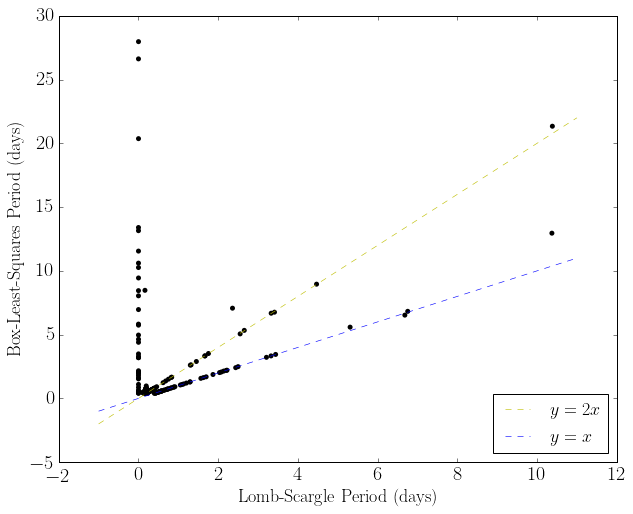

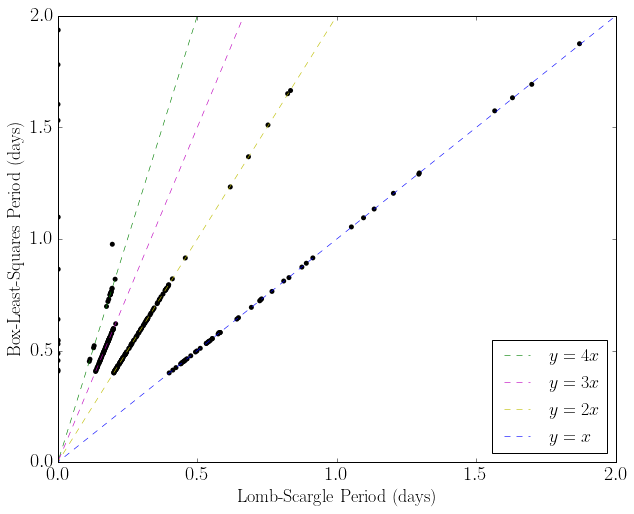

In [55]:
xarr = np.arange(min(ls_period)-1, max(ls_period)+1)
yarr2 = 2*xarr
yarr3 = 3*xarr
yarr4 = 4*xarr

plt.figure(figsize=[10,8])
plt.scatter(ls_period, bls_period, edgecolor='None', s=25, color='k')

plt.plot(xarr, yarr2, linewidth=.6, linestyle='--', color='y', label=r'$y=2x$')
plt.plot(xarr, xarr, linewidth=.6, linestyle='--', color='b', label=r'$y=x$')

plt.xlabel('Lomb-Scargle Period (days)', fontsize=18)
plt.ylabel('Box-Least-Squares Period (days)', fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.show()

# =======================
plt.figure(figsize=[10,8])
plt.scatter(ls_period, bls_period, edgecolor='None', s=25, color='k')

plt.plot(xarr, yarr4, linewidth=.6, linestyle='--', color='g', label=r'$y=4x$')
plt.plot(xarr, yarr3, linewidth=.6, linestyle='--', color='m', label=r'$y=3x$')
plt.plot(xarr, yarr2, linewidth=.6, linestyle='--', color='y', label=r'$y=2x$')
plt.plot(xarr, xarr, linewidth=.6, linestyle='--', color='b', label=r'$y=x$')

plt.xlabel('Lomb-Scargle Period (days)', fontsize=18)
plt.ylabel('Box-Least-Squares Period (days)', fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.xlim(0,2)
plt.ylim(0,2)
plt.show()